# TVB Fish

## Overview

We are going to set up a TVB model using coarse-scale zebrafish connectivity data.

## Notebook Setup

Define some variables

In [1]:
data_dir = '../data/tvb_fish'

tvb_folder = '~/Code/libraries_of_mine/github'

Importage

In [2]:
import os,sys,glob,numpy as np,pandas as pd
from copy import deepcopy

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

sys.path += [tvb_folder + '/' + t for t in ['tvb-library', 'tvb-data']]
from tvb.simulator.lab import *

Ok, let's get cracking.

## Load the data

In [30]:
weights = np.loadtxt(data_dir + '/weights_orig.txt')

In [31]:
centres = np.loadtxt(data_dir + '/centres_orig.txt')

In [32]:
tract_lengths = np.loadtxt(data_dir + '/tract_lengths.txt')

`centres_orig.txt` needs modifying; roi names need to be added as a first column


In [33]:
names = np.array(['roi%s' %(r+1) for r in range(centres.shape[0])])

In [34]:
df_nc = pd.DataFrame(centres, columns=['x', 'y', 'z']).astype(str)
df_nc['names'] = names
df_nc[['names', 'x', 'y', 'z']].to_csv(data_dir + '/centres.txt', 
                                       header=False, sep=' ', index=False)

In [35]:
df_nc[['names', 'x', 'y', 'z']].head()

,names,x,y,z
0,roi1,279.0,162.0,40.0
1,roi2,284.0,214.0,40.0
2,roi3,296.0,251.0,40.0
3,roi4,347.0,274.0,40.0
4,roi5,280.0,146.0,50.0


In [36]:
f = open(data_dir + '/centres.txt', 'w+')

In [37]:
for l in df_nc[['names', 'x', 'y', 'z']].values:
  f.writelines(' '.join(l) + '\n')
f.close()

In [38]:
cat $data_dir/centres.txt

roi1 279.0 162.0 40.0
roi2 284.0 214.0 40.0
roi3 296.0 251.0 40.0
roi4 347.0 274.0 40.0
roi5 280.0 146.0 50.0
roi6 282.0 203.0 50.0
roi7 295.0 247.0 50.0
roi8 332.0 266.0 50.0
roi9 375.0 283.0 50.0
roi10 280.0 127.0 60.0
roi11 281.0 182.0 60.0
roi12 287.0 228.0 60.0
roi13 317.0 256.0 60.0
roi14 372.0 283.0 60.0
roi15 283.0 125.0 70.0
roi16 282.0 190.0 70.0
roi17 290.0 234.0 70.0
roi18 332.0 262.0 70.0
roi19 391.0 286.0 70.0
roi20 287.0 108.0 80.0
roi21 283.0 168.0 80.0
roi22 287.0 213.0 80.0
roi23 310.0 242.0 80.0
roi24 349.0 268.0 80.0
roi25 406.0 288.0 80.0
roi26 287.0 110.0 90.0
roi27 282.0 174.0 90.0
roi28 288.0 216.0 90.0
roi29 317.0 241.0 90.0
roi30 354.0 268.0 90.0
roi31 411.0 288.0 90.0
roi32 289.0 112.0 100.0
roi33 286.0 174.0 100.0
roi34 293.0 212.0 100.0
roi35 322.0 234.0 100.0
roi36 357.0 257.0 100.0
roi37 414.0 292.0 100.0
roi38 310.0 134.0 110.0
roi39 314.0 193.0 110.0
roi40 336.0 231.0 110.0
roi41 372.0 264.0 110.0
roi42 427.0 288.0 110.0
roi43 320.0 141.0 120.0
roi44 34

Currently when using the GUI there is an (unnecessary) error check which prevents the use of negative weights. There is a hack to fix this; but for the moment also make a new weights matrix with all positive values.


In [40]:
weights_allpos = deepcopy(weights)

In [41]:
weights_allpos[weights_allpos==1] = 1

In [42]:
weights_allpos[weights_allpos==-1] = 2

In [43]:
np.savetxt(data_dir + '/weights_allpos.txt', weights_allpos)

Make a zip folder

In [45]:
os.chdir(data_dir)

In [46]:
!rm -r fish_connectivity

!mkdir fish_connectivity

rm: cannot remove 'fish_connectivity': No such file or directory


In [47]:
cp weights.txt fish_connectivity/

In [48]:
cp tract_lengths.txt fish_connectivity/

In [49]:
cp centres.txt fish_connectivity/

In [50]:
!rm fish_connectivity.zip

rm: cannot remove 'fish_connectivity.zip': No such file or directory


In [51]:
!zip -r fish_connectivity.zip fish_connectivity

  adding: fish_connectivity/ (stored 0%)
  adding: fish_connectivity/centres.txt (deflated 72%)
  adding: fish_connectivity/tract_lengths.txt (deflated 61%)
  adding: fish_connectivity/weights.txt (deflated 99%)


Repeat for the all positive weights matrix

In [52]:
!rm -r fish_connectivity_allpos

rm: cannot remove 'fish_connectivity_allpos': No such file or directory


In [53]:
mkdir fish_connectivity_allpos

In [54]:
cp weights_allpos.txt fish_connectivity_allpos/weights.txt

In [55]:
cp tract_lengths.txt fish_connectivity_allpos/

In [56]:
cp centres.txt fish_connectivity_allpos/

In [57]:
!rm fish_connectivity_allpos.zip

rm: cannot remove 'fish_connectivity_allpos.zip': No such file or directory


In [58]:
!zip -r fish_connectivity_allpos.zip fish_connectivity_allpos

  adding: fish_connectivity_allpos/ (stored 0%)
  adding: fish_connectivity_allpos/centres.txt (deflated 72%)
  adding: fish_connectivity_allpos/tract_lengths.txt (deflated 61%)
  adding: fish_connectivity_allpos/weights.txt (deflated 100%)


## Import to TVB

In [60]:
conn = connectivity.Connectivity.from_file(os.path.abspath('fish_connectivity.zip'))

WARNING  File 'average_orientations' not found in ZIP.
WARNING  File 'cortical' not found in ZIP.
WARNING  File 'hemispheres' not found in ZIP.
WARNING  File 'areas' not found in ZIP.


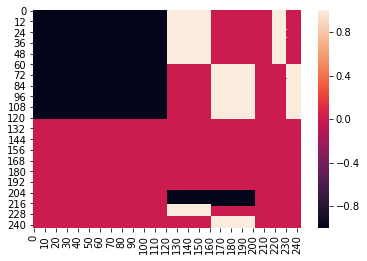

In [61]:
sns.heatmap(conn.weights, linecolor=None)

## Plot 2D

In [67]:
df_centres = pd.DataFrame(conn.centres, columns=['x', 'y', 'z'])

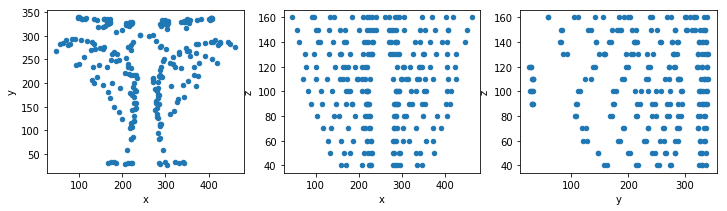

In [68]:
fig, ax = plt.subplots(ncols=3, figsize=(12,3))

df_centres.plot(kind='scatter', x='x', y='y', ax=ax[0])
df_centres.plot(kind='scatter', x='x', y='z', ax=ax[1])
df_centres.plot(kind='scatter', x='y', y='z', ax=ax[2])

## Plot 3D

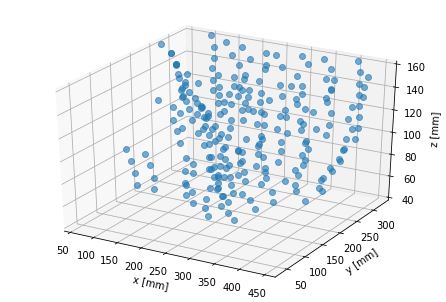

In [62]:
fig, ax = plt.subplots()
plot_3d_centres(conn.centres)#,axes=ax)